In [1]:
# I will import all needed modules here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [2]:
IcedId_raw_data_df = pd.read_csv('IcedId_only_data_set.csv')
IcedId_raw_data_df['malware'] = 1
IcedId_raw_data_df

ip_ip.len_0  eth_eth.dst_tree_eth.addr_resolved_0  \
0         278.0                                   2.0   
1         348.0                                   2.0   
2         345.0                                   2.0   
3         320.0                                   2.0   
4         346.0                                  43.0   
5         339.0                                   2.0   
6         343.0                                   2.0   
7         336.0                                  64.0   
8         347.0                                  71.0   
9         343.0                                   2.0   
10        337.0                                  83.0   
11        337.0                                   2.0   
12        345.0                                   2.0   

    tcp_tcp.flags_tree_tcp.flags.res_0  eth_eth.src_tree_eth.addr_resolved_0  \
0                                  0.0                                   4.0   
1                                  0.0                                   4.0   
2                                  0.0                                   4.0   
3                                  0.0                                   4.0   
4                                  0.0                                  45.0   
5                                  0.0                                   4.0   
6                                  0.0                                   4.0   
7                                  0.0                                  65.0   
8                                  0.0                                  72.0   
9                                  0.0                                   4.0   
10                                 0.0                                  84.0   
11                                 0.0                                   4.0   
12                                 0.0                                   4.0   

    tcp_tcp.flags_tree_tcp.flags.urg_0  tcp_tcp.flags_tree_tcp.flags.ae_0  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
5                                  0.0                                0.0   
6                                  0.0                                0.0   
7                                  0.0                                0.0   
8                                  0.0                                0.0   
9                                  0.0                                0.0   
10                                 0.0                                0.0   
11                                 0.0                                0.0   
12                                 0.0                                0.0   

    eth_eth.src_tree_eth.lg_0  eth_eth.dst_tree_eth.ig_0  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        0.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         0.0                        0.0   
10                        0.0                        0.0   
11                        0.0                        0.0   
12                        0.0                        0.0   

    http_GET / HTTP/1.1\r\n__ws.expert__ws.expert.message_0  \
0                                                 8.0         
1                                     

In [3]:
IcedId_noraml_raw_data_df = pd.read_csv('normal_IcedId_only_data_set.csv')
IcedId_noraml_raw_data_df['malware'] = 0
IcedId_noraml_raw_data_df

ip_ip.len_0  eth_eth.dst_tree_eth.addr_resolved_0  \
0          152.0                                 111.0   
1          289.0                                 111.0   
2          289.0                                 111.0   
3          405.0                                 111.0   
4          152.0                                 111.0   
..           ...                                   ...   
402        253.0                                 111.0   
403        152.0                                 111.0   
404        152.0                                 111.0   
405        152.0                                 111.0   
406        152.0                                 111.0   

     tcp_tcp.flags_tree_tcp.flags.res_0  eth_eth.src_tree_eth.addr_resolved_0  \
0                                   0.0                                 113.0   
1                                   0.0                                 113.0   
2                                   0.0                                 113.0   
3                                   0.0                                 113.0   
4                                   0.0                                 113.0   
..                                  ...                                   ...   
402                                 0.0                                 113.0   
403                                 0.0                                 113.0   
404                                 0.0                                 113.0   
405                                 0.0                                 113.0   
406                                 0.0                                 113.0   

     tcp_tcp.flags_tree_tcp.flags.urg_0  tcp_tcp.flags_tree_tcp.flags.ae_0  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   0.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   
..                                  ...                                ...   
402                                 0.0                                0.0   
403                                 0.0                                0.0   
404                                 0.0                                0.0   
405                                 0.0                                0.0   
406                                 0.0                                0.0   

     eth_eth.src_tree_eth.lg_0  eth_eth.dst_tree_eth.ig_0  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
402                        0.0                        0.0   
403                        0.0                        0.0   
404                        0.0                        0.0   
405                        0.0                        0.0   
406                        0.0                        0.0   

     http_GET / HTTP/1.1\r\n__ws.expert__ws.expert.message_0  \
0                                                  0.0         
1                                                  0.0         
2                                                  0.0         
3                                                  0.0         
4                                                  0.0         
..                                                 ...         
402                                                0.0         
403                                                0.0         
404                                                0.0         
405                      

In [25]:
mixed_icedid_df = pd.concat([IcedId_raw_data_df, IcedId_noraml_raw_data_df])
mixed_icedid_df

ip_ip.len_0  eth_eth.dst_tree_eth.addr_resolved_0  \
0          278.0                                   2.0   
1          348.0                                   2.0   
2          345.0                                   2.0   
3          320.0                                   2.0   
4          346.0                                  43.0   
..           ...                                   ...   
402        253.0                                 111.0   
403        152.0                                 111.0   
404        152.0                                 111.0   
405        152.0                                 111.0   
406        152.0                                 111.0   

     tcp_tcp.flags_tree_tcp.flags.res_0  eth_eth.src_tree_eth.addr_resolved_0  \
0                                   0.0                                   4.0   
1                                   0.0                                   4.0   
2                                   0.0                                   4.0   
3                                   0.0                                   4.0   
4                                   0.0                                  45.0   
..                                  ...                                   ...   
402                                 0.0                                 113.0   
403                                 0.0                                 113.0   
404                                 0.0                                 113.0   
405                                 0.0                                 113.0   
406                                 0.0                                 113.0   

     tcp_tcp.flags_tree_tcp.flags.urg_0  tcp_tcp.flags_tree_tcp.flags.ae_0  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   0.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   
..                                  ...                                ...   
402                                 0.0                                0.0   
403                                 0.0                                0.0   
404                                 0.0                                0.0   
405                                 0.0                                0.0   
406                                 0.0                                0.0   

     eth_eth.src_tree_eth.lg_0  eth_eth.dst_tree_eth.ig_0  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
402                        0.0                        0.0   
403                        0.0                        0.0   
404                        0.0                        0.0   
405                        0.0                        0.0   
406                        0.0                        0.0   

     http_GET / HTTP/1.1\r\n__ws.expert__ws.expert.message_0  \
0                                                  8.0         
1                                                  8.0         
2                                                  8.0         
3                                                  8.0         
4                                                  8.0         
..                                                 ...         
402                                                0.0         
403                                                0.0         
404                                                0.0         
405                      

In [26]:
mixed_one_to_one_icedid_df = pd.concat([IcedId_raw_data_df, IcedId_noraml_raw_data_df.sample(n = IcedId_raw_data_df.shape[0])])
mixed_one_to_one_icedid_df

ip_ip.len_0  eth_eth.dst_tree_eth.addr_resolved_0  \
0          278.0                                   2.0   
1          348.0                                   2.0   
2          345.0                                   2.0   
3          320.0                                   2.0   
4          346.0                                  43.0   
5          339.0                                   2.0   
6          343.0                                   2.0   
7          336.0                                  64.0   
8          347.0                                  71.0   
9          343.0                                   2.0   
10         337.0                                  83.0   
11         337.0                                   2.0   
12         345.0                                   2.0   
167        427.0                                 194.0   
390        522.0                                 194.0   
405        152.0                                 111.0   
140        503.0                                 194.0   
80         512.0                                 194.0   
402        253.0                                 111.0   
27         511.0                                 194.0   
361        823.0                                 194.0   
63         510.0                                 194.0   
256        516.0                                 194.0   
93         253.0                                 194.0   
131          0.0                                 194.0   
178        478.0                                 194.0   

     tcp_tcp.flags_tree_tcp.flags.res_0  eth_eth.src_tree_eth.addr_resolved_0  \
0                                   0.0                                   4.0   
1                                   0.0                                   4.0   
2                                   0.0                                   4.0   
3                                   0.0                                   4.0   
4                                   0.0                                  45.0   
5                                   0.0                                   4.0   
6                                   0.0                                   4.0   
7                                   0.0                                  65.0   
8                                   0.0                                  72.0   
9                                   0.0                                   4.0   
10                                  0.0                                  84.0   
11                                  0.0                                   4.0   
12                                  0.0                                   4.0   
167                                 0.0                                 196.0   
390                                 0.0                                 196.0   
405                                 0.0                                 113.0   
140                                 0.0                                 196.0   
80                                  0.0                                 196.0   
402                                 0.0                                 113.0   
27                                  0.0                                 196.0   
361                                 0.0                                 196.0   
63                                  0.0                                 196.0   
256                                 0.0                                 196.0   
93                                  0.0                                 196.0   
131                                 0.0                                 196.0   
178                                 0.0                                 196.0   

     tcp_tcp.flags_tree_tcp.flags.urg_0  tcp_tcp.flags_tree_tcp.flags.ae_0  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2               

In [10]:

mixed_icedid_corr_df = mixed_icedid_df.corr()
mixed_one_to_one_icedid_corr_df = mixed_one_to_one_icedid_df.corr()

# Use corrlations to find the useful fields 

In [ ]:

# the chat take too long time to build, so comment it for now
plt.figure(figsize = (20,20))
sns.heatmap(mixed_icedid_corr_df, annot=True)

<AxesSubplot:>

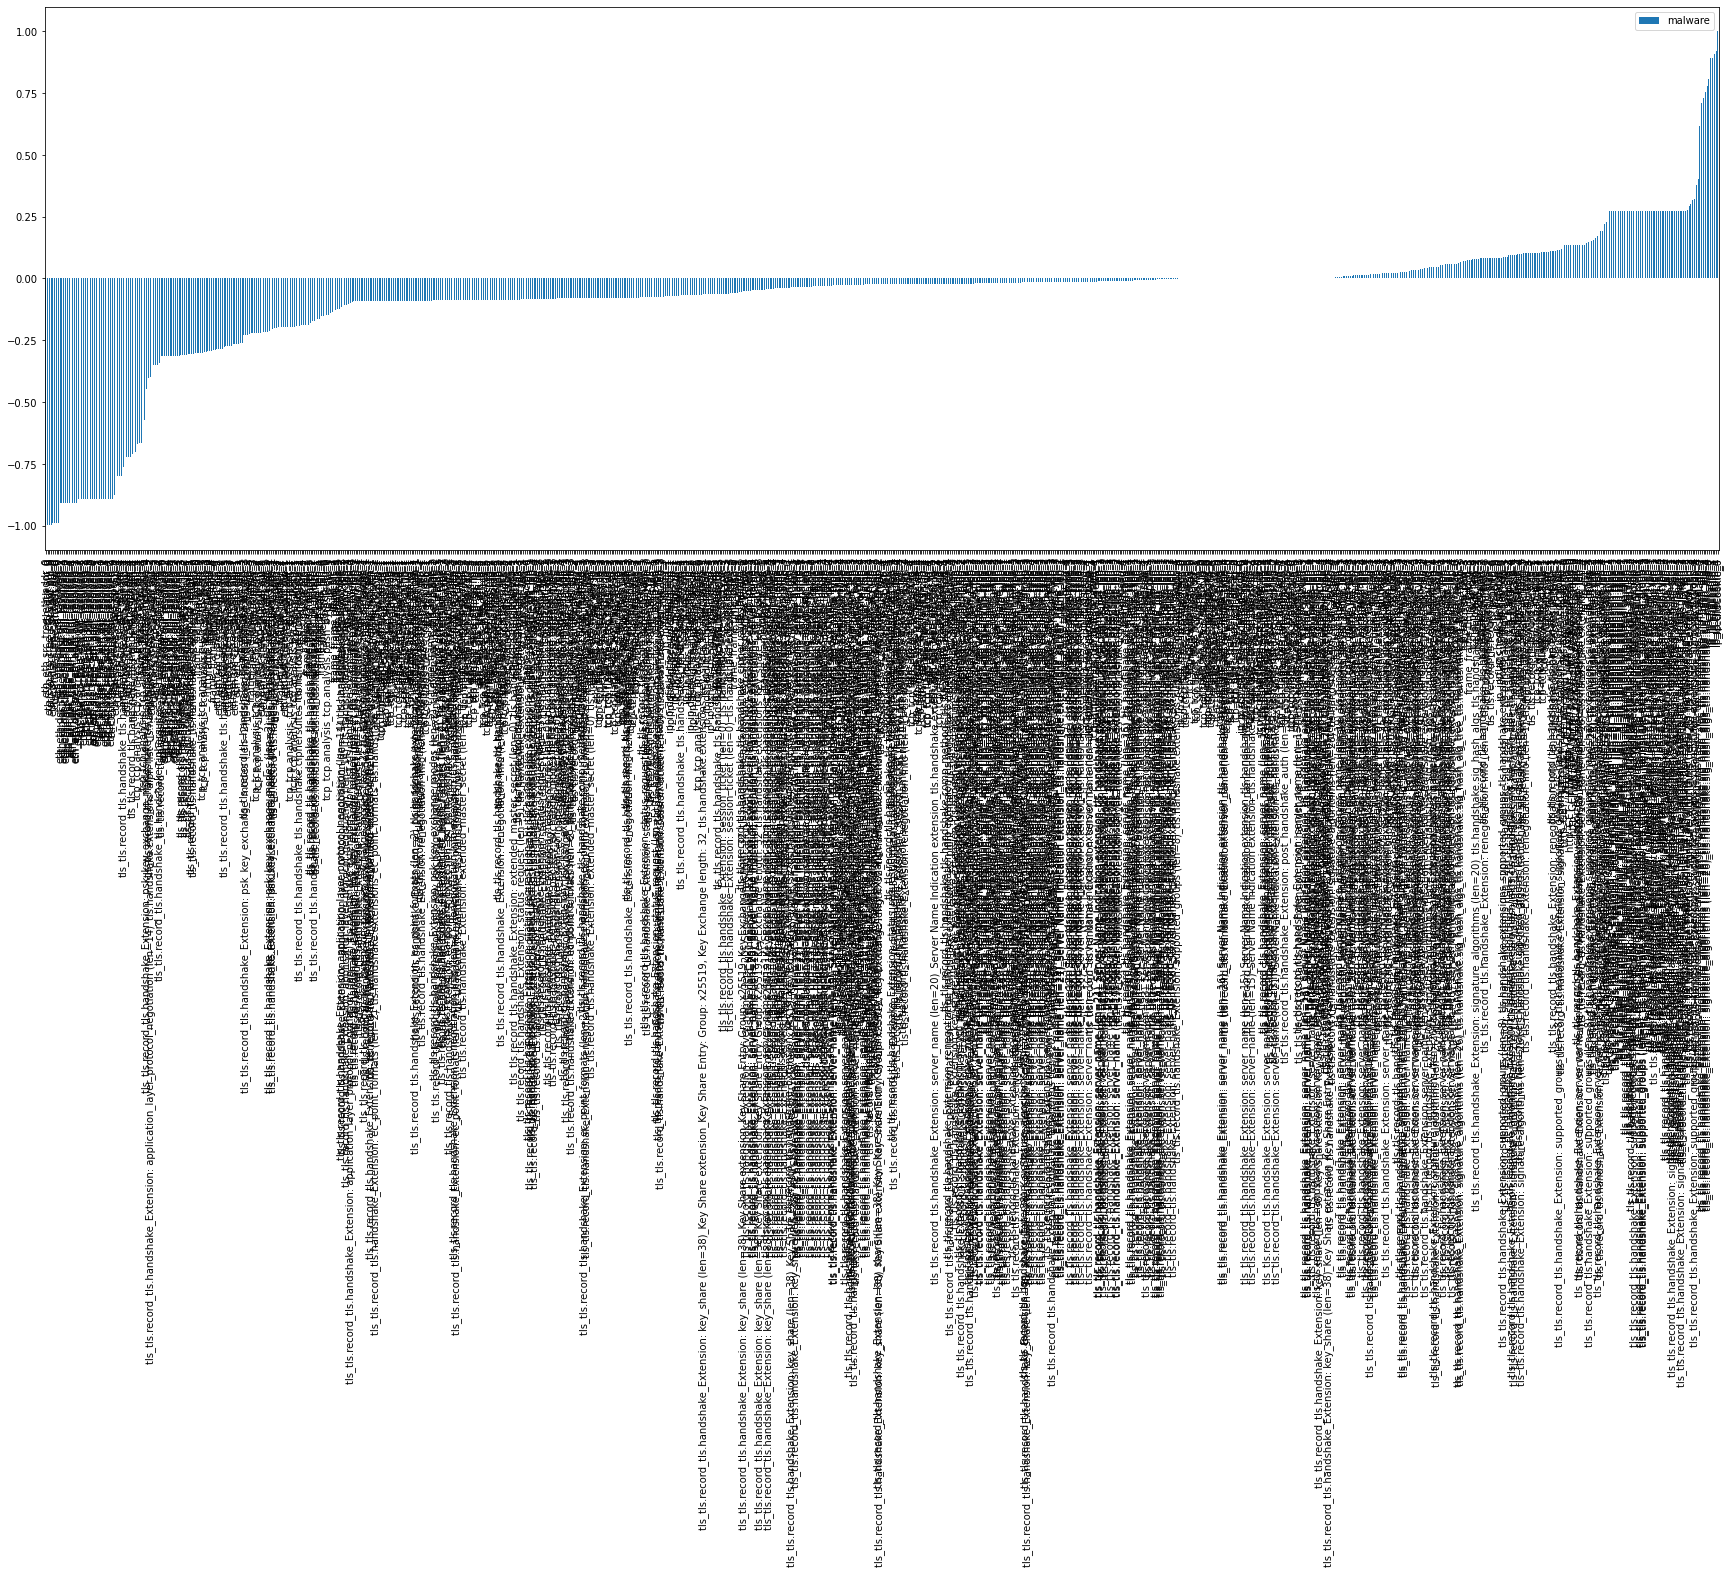

In [11]:
mixed_icedid_corr_df = mixed_icedid_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_icedid_corr_df
mixed_icedid_corr_df.plot(kind="bar", figsize=(30,10))

In [12]:
filtered_mixed_icedid_corr_df = mixed_icedid_corr_df[abs(mixed_icedid_corr_df['malware']) > 0.5]
corr_good_fields = list(filtered_mixed_icedid_corr_df.T.columns) 
print(len(corr_good_fields))
corr_good_fields

67


['eth_eth.src_tree_eth.addr_0',
 'eth_eth.src_0',
 'eth_eth.src_tree_eth.addr.oui_0',
 'eth_eth.src_tree_eth.src.oui_0',
 'eth_eth.dst_tree_eth.addr.oui_0',
 'eth_eth.dst_tree_eth.dst.oui_0',
 'eth_eth.dst_0',
 'eth_eth.dst_tree_eth.addr_0',
 'eth_eth.dst_tree_eth.addr.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr.oui_resolved_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_0',
 'eth_eth.dst_tree_eth.dst.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst.oui_resolved_3',
 'eth_eth.dst_tree_eth.dst.oui_resolved_0',
 'eth_eth.dst_tree_eth.dst.oui_resolved_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr.oui_resolved_3',
 'eth_eth.src_tree_eth.addr_resolved_3',
 'eth_eth.src_tree_eth.src_resolved_2',
 'eth_eth.src_tree_eth.src_resolved_1',
 'eth_eth.src_tree_eth.addr_resolved_2',
 'eth_eth.src_tree_eth.src_resolved_3',
 'eth_eth.src_tree_eth.src_resolved_4',
 'eth_eth.src_tree_eth.addr_resolved_1',
 'eth_eth.src_tree_eth.src_res

<AxesSubplot:>

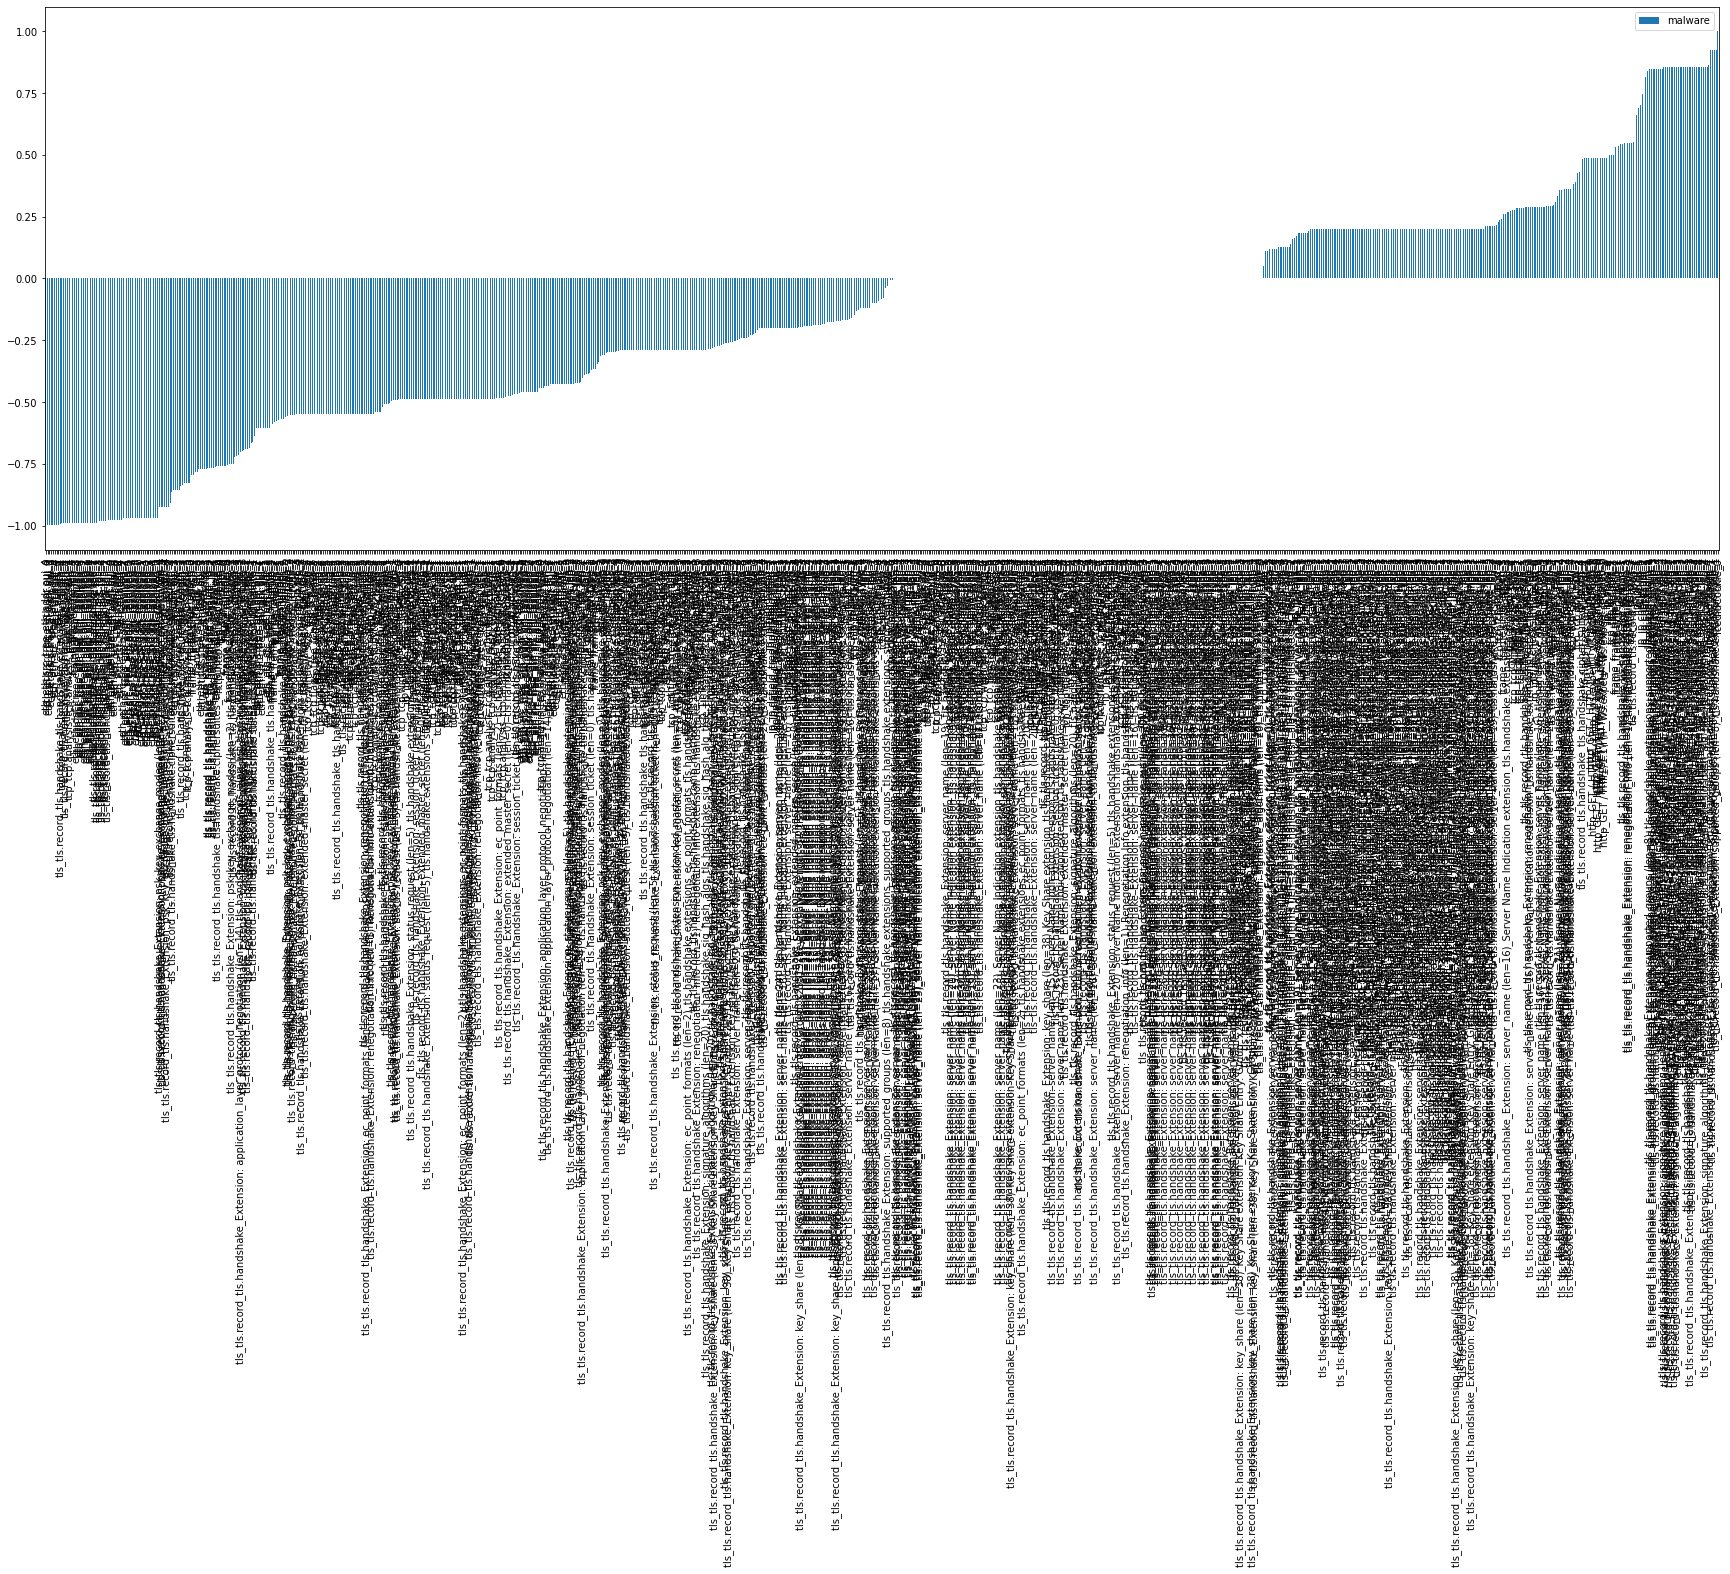

In [13]:
# one to one corr mixed_one_to_one_icedid_df
mixed_one_to_one_icedid_corr_df = mixed_one_to_one_icedid_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_one_to_one_icedid_corr_df.plot(kind="bar", figsize=(30,10))

In [14]:
mixed_one_to_one_icedid_corr_df = mixed_one_to_one_icedid_corr_df[abs(mixed_one_to_one_icedid_corr_df['malware']) > 0.5]
corr_one_to_one_good_fields = list(mixed_one_to_one_icedid_corr_df.T.columns) 
print(len(corr_one_to_one_good_fields))
corr_one_to_one_good_fields

252


['eth_eth.src_tree_eth.addr.oui_4',
 'eth_eth.src_tree_eth.src.oui_0',
 'eth_eth.src_tree_eth.addr.oui_0',
 'eth_eth.src_tree_eth.src.oui_4',
 'eth_eth.src_tree_eth.addr_0',
 'eth_eth.src_tree_eth.addr_4',
 'eth_eth.src_4',
 'eth_eth.src_0',
 'tls_tls.record_tls.handshake_tls.handshake.extensions_length_4',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4',
 'tcp_tcp.len_4',
 'tls_tls.record_tls.handshake_tls.handshake.length_4',
 'tls_tls.record_tls.record.length_4',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_4',
 'tcp_tcp.nxtseq_4',
 'frame_frame.len_4',
 'frame_frame.cap_len_4',
 'eth_eth.dst_tree_eth.addr.oui_resolved_3',
 'eth_eth.dst_tree_eth.dst.oui_resolved_4',
 'eth_eth.dst_tree_eth.dst.oui_resolved_0',
 'eth_eth.dst_tree_eth.dst.oui_resolved_3',
 'eth_eth.dst_tree_eth.addr.oui_resolved_2',
 'eth_eth.dst_tree_eth.dst.oui_resolved_2',
 'eth_eth.dst_tree_eth.addr.oui_resolved_1',
 'eth_eth.dst_tree_eth.addr.oui_resolved_0',
 'eth_eth.dst_tree_eth.addr.oui_resolved_4',
 'et

# Use Fisher’s Score

In [7]:

def get_train_test_data(data_df, features_list, test_size, labels_list):
    #Set up train and test data
    #features_list = np.concatenate((full_attributes_list_np,full_categories_list_np,common_fields_list,open_hour_fields_list), axis=None)
    sc = StandardScaler()
    labels_list = labels_list
    X=data_df[features_list]
    #display("Before Change",X)
    sc.fit(X)
    X = sc.transform(X)
    #display("After Change",X[:,:5])
    #display(len(X))
    y=data_df[labels_list]
    if test_size == 0:
        return X,[],y,[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=5)
    return X_train, X_test, y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

def get_k_fold_data_set(data_df, features_list, num_splits, labels_list, shuffle=True, to_df=False):
    sc = StandardScaler()
    kf = KFold(n_splits=num_splits, shuffle=shuffle)
    train_test_set_list=[]
    X=data_df[features_list].drop(labels_list, axis=1).to_numpy()
    sc.fit(X)
    X = sc.transform(X)
    y=data_df[labels_list].to_numpy()
    for train_index, test_index in kf.split(X):
        data_train, data_test = X[train_index], X[test_index]
        label_train, label_test = y[train_index], y[test_index]
        if to_df:
            data_train=pd.DataFrame(data_train,columns=features_list)
            data_test=pd.DataFrame(data_test,columns=features_list)
        train_test_set_list.append([data_train, data_test,label_train.flatten(), label_test.flatten()])
    return train_test_set_list


In [8]:
# Do k-flod on malware record and normal record and mix them together, to make sure that trian and test both has the malware data
def k_fold_unmixed_malware_normal_record(local_malware_data_df, local_normal_data_df, features_list, num_splits, labels_list, oneToOne= False, shuffle=True, to_df=False):
    local_malware_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_malware_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    local_normal_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_normal_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    train_test_set_list= []
    for idx in range(len(local_malware_k_fold_train_test_all_data_set_list_list)):
        local_train_test_record = []
        if oneToOne:
            malware_train_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][0])
            malware_test_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][1])
            local_normal_k_fold_train_test_all_data_set_list_list[idx][0] = local_normal_k_fold_train_test_all_data_set_list_list[idx][0][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][1] = local_normal_k_fold_train_test_all_data_set_list_list[idx][1][: malware_test_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][2] = local_normal_k_fold_train_test_all_data_set_list_list[idx][2][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][3] = local_normal_k_fold_train_test_all_data_set_list_list[idx][3][: malware_test_len]

        for record_idx in range(4):
            local_train_test_record.append(np.concatenate((local_malware_k_fold_train_test_all_data_set_list_list[idx][record_idx], local_normal_k_fold_train_test_all_data_set_list_list[idx][record_idx])))
        train_random_idx = np.random.permutation(len(local_train_test_record[0]))
        test_random_idx = np.random.permutation(len(local_train_test_record[1]))
        local_train_test_record[0] = local_train_test_record[0][train_random_idx]
        local_train_test_record[1] = local_train_test_record[1][test_random_idx]
        local_train_test_record[2] = local_train_test_record[2][train_random_idx]
        local_train_test_record[3] = local_train_test_record[3][test_random_idx]
        train_test_set_list.append(local_train_test_record)
    return train_test_set_list


In [15]:
# mixed_icedid_df mixed mixed_one_to_one_icedid_df
k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(mixed_one_to_one_icedid_df, list(mixed_one_to_one_icedid_df.columns), 5, ['malware'])
len(k_fold_train_test_all_data_set_list_list)

5

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


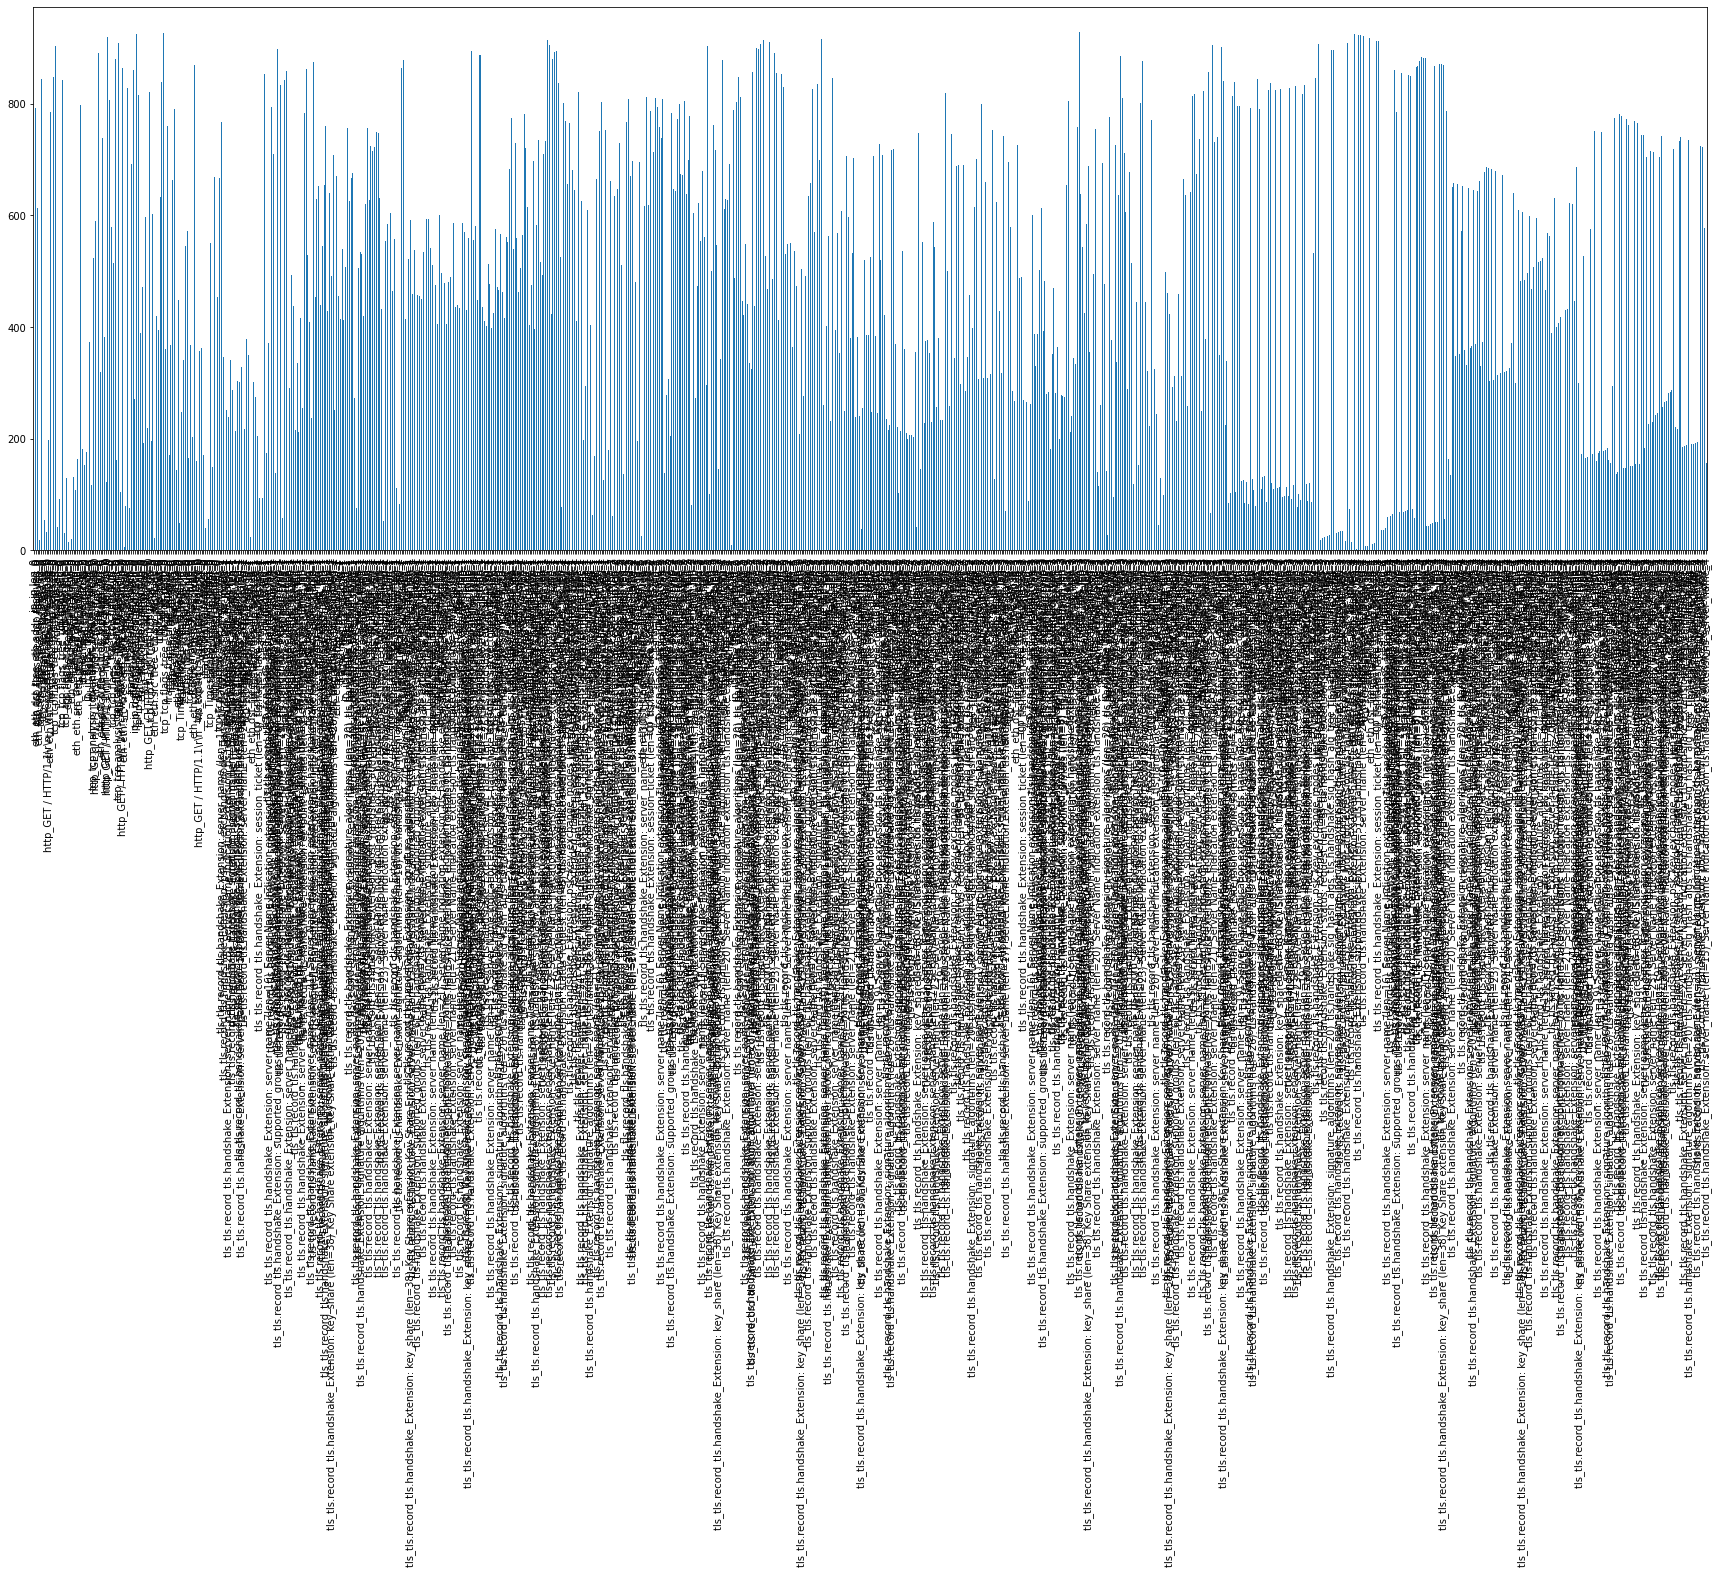

In [16]:
# Calculating scores 
score = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2])
featrue_importances = pd.Series(score, mixed_one_to_one_icedid_df.columns[0:len(mixed_one_to_one_icedid_df.columns)-1])
featrue_importances.plot(kind="bar", figsize=(30,10))
plt.show()

In [17]:
featrue_importances_df = pd.DataFrame({'field':featrue_importances.index, 'score': featrue_importances.values})
featrue_importances_df = featrue_importances_df.sort_values(by='score', ascending=False)
featrue_importances_df

field  score
580  tls_tls.record_tls.handshake_Extension: server...    928
72                                         ip_ip.ttl_0    927
733  tls_tls.record_tls.handshake_Extension: server...    926
57                  tcp_tcp.flags_tree_tcp.flags.ecn_0    925
735  tls_tls.record_tls.handshake_Extension: suppor...    924
..                                                 ...    ...
91                  tcp_tcp.flags_tree_tcp.flags.str_0      4
734                 tcp_tcp.flags_tree_tcp.flags.res_4      3
732               eth_eth.dst_tree_eth.addr_resolved_4      2
849                                      eth_eth.dst_4      1
587  tls_tls.record_tls.handshake_Extension: signat...      0

[929 rows x 2 columns]

In [18]:
fisher_rank = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2], mode='rank')
fisher_rank

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


array([780, 792, 614,  18, 844,  65,  54,  33, 197, 785, 143, 848, 903,
        41,  91, 873, 842,  30, 130,  15, 106,  20, 132, 108, 164, 732,
       798, 181, 152, 176, 311, 373, 116, 523, 590, 186, 891, 319, 739,
       383, 123, 919, 807, 579, 515, 880, 162, 909, 105, 865,   6,  79,
       828,  75, 693, 861, 271, 925, 816, 389, 472, 192, 598, 219, 821,
       196, 603,  21, 420, 394, 633, 839, 927, 361, 761, 170, 367, 663,
       791, 144, 448,  49, 247, 341, 546, 573, 165, 368, 203, 869, 160,
         4, 357, 362, 171,  39,  53,  55, 551, 149, 669, 253, 454, 667,
       767, 346, 452, 251, 239, 340, 287, 227, 213, 304, 302, 329, 326,
       218, 378, 349,  24, 359, 301, 275, 205,  94, 874,  93, 853, 174,
       371, 577, 795, 711, 138, 899,  13, 833,  57, 843, 859, 567, 290,
       494, 438, 216, 335, 211, 417, 255, 784, 862, 529, 409, 237, 875,
       453, 630, 653, 440, 545, 655, 760, 428, 641, 491, 708, 252, 671,
       456, 414, 540, 412, 508, 756, 625, 668, 676, 272,  76, 50

# Start to do SVM training

In [19]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, mean_squared_error

In [20]:
kernel_list=['rbf', 'poly', 'sigmoid']
param_grid = {'C': [1, 10, 25, 50, 100], 'gamma': [0.1, 0.05, 0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid'], 'degree':[3,9]}

In [21]:
def get_rt_model_score(model, train_test_data_set_list, allow_log=True):
    X,x,Y,y = train_test_data_set_list
    score_message_dict={}
    y_pred=model.predict(x)
    x_pred=model.predict(X)
    score_message_dict['accuracy_score'] = accuracy_score(y, y_pred)
    score_message_dict['precision_score'] = precision_score(y, y_pred,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,y_pred,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,y_pred,average='weighted')
    score_message_dict['train_rmse'] = np.sqrt(mean_squared_error(Y, x_pred))
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, y_pred))

    if allow_log:
        print("Accuracy for Train set:",accuracy_score(Y, x_pred))
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('train_rmse: %.3f' % score_message_dict['train_rmse'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

def get_score(result_list, y, allow_log=True):
    score_message_dict={}
    score_message_dict['accuracy_score'] = accuracy_score(y, result_list)
    score_message_dict['precision_score'] = precision_score(y, result_list,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,result_list,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,result_list,average='weighted')
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, result_list))

    if allow_log:
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

In [22]:
def train_SVM(model,train_test_data_set_list):
    X,x,Y,y = train_test_data_set_list
    model.fit(X,Y)
    return model

### Let me start with Linear Kernel 

In [23]:
# get_k_fold_data_set(mixed_icedid_df, list(mixed_icedid_df.columns), 5, ['malware'])
train_test_data_set_list = list(get_train_test_data(mixed_one_to_one_icedid_df, list(mixed_one_to_one_icedid_df.columns), 0.2, ['malware']))
linear_SVM_clf = svm.SVC(kernel='linear')
linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_set_list)
get_rt_model_score(linear_SVM_clf, train_test_data_set_list)

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'train_rmse': 0.0,
 'test_rmse': 0.0}

In [24]:
# with K fold k=5
score_list = []
for train_test_data_list in k_fold_train_test_all_data_set_list_list:
    linear_SVM_clf = svm.SVC(kernel='linear')
    linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_list)
    score_list.append(get_rt_model_score(linear_SVM_clf, train_test_data_list))

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



# Free Space

In [68]:
for t in k_fold_train_test_all_data_set_list_list[0][0]:
    print(t[84])

5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
5.595327721205642
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-0.17872054146357086
-

In [69]:
k_fold_train_test_all_data_set_list_list[0][2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
#IcedId_raw_data_df IcedId_noraml_raw_data_df
for idx in range(len(list(IcedId_noraml_raw_data_df.columns))):
    if list(IcedId_raw_data_df.columns)[idx] == 'IcedIdCookie_0':
        print(idx)

84
